Jupyter with virtual environments: https://janakiev.com/blog/jupyter-virtual-envs/ 

This is a quick notebook to show one way to implement an MCMC very quickly. https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm 

Pick some test function eg https://en.wikipedia.org/wiki/Test_functions_for_optimization

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def func(pars, x):
    # Rastrigin function
    # x is the multidimensional position vector
    n = len(x)
    A = 10.
    return A*n+np.sum([x[i]**2-A*np.cos(2*np.pi*x[i]) for i in range(n)])
    
    

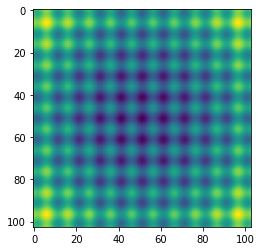

In [3]:
plt.imshow(np.array([[func([],[i,j]) for i in np.arange(-5.12,5.12,0.1)] for j in np.arange(-5.12,5.12,0.1)]))

This function is one to be minimized, but the general principle remains the same in a maximum case too.
Ideally the cost space is positive definite. If there are odd features with the parameter space or whatever, then constraints have to be imposed somehow. They can be imposed either via candidate x selection or via some cost premium.

In [4]:
#initialize
dim = 4 # can change dimensionality 
x = 5.-10.*np.random.rand(dim)
cost = func([],x)
xMin = np.copy(x)
costMin = np.copy(cost)
xHist = np.array([x])
costHist = np.array([cost])


This is the most basic MCMC metropolis hastings code.

In [5]:
step = 1.
for k in range(10000):
    xStar = x + step*(1.-2.*np.random.rand(dim))
    costStar = func([],xStar)
    # Determine whether to move the chain forward
    if cost/costStar > np.random.rand(1)[0]:
        x = xStar
        cost = costStar
        xHist = np.append(xHist,[x],axis=0)
        costHist = np.append(costHist,cost)
    # Update the global minimum if necessary
    if cost < costMin:
        xMin = x
        costMin = cost
        print(cost)
        
print(xMin)
print(costMin)

64.40483056069189
60.906785111785595
54.516055785252284
51.293464944649955
40.837822703888136
36.02650645785448
34.89221485107711
25.19944168579814
15.116165479602802
11.699681802380987
[ 2.09589191 -0.01192815  1.06143226  0.1402082 ]
11.699681802380987


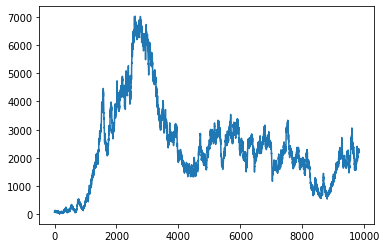

In [6]:
plt.plot(costHist)

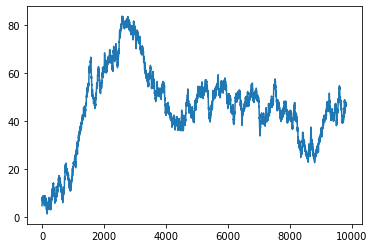

In [7]:
plt.plot(np.sum(xHist**2,axis=1)**0.5)

What we're finding here is that the chain is tending to wander away from the place we want it to. This is caused by two issues, first that the step size is arbitrary, and second that it's accepting too many bad options. We should monitor the acceptance rate and keep it around 0.25 by altering the annealing rate and changing the step size.

In [170]:
#initialize
dim = 10 # can change dimensionality 
x = 5.-10.*np.random.rand(dim)
cost = func([],x)
xMin = np.copy(x)
costMin = np.copy(cost)
xHist = np.array([x])
costHist = np.array([cost])
accept=np.zeros(50)
accept[::4]+=1.

In [171]:
step = 1.
anneal = 1.
stepDecrementIndex = 1000
maxSteps=1000000

for k in range(maxSteps):
    xStar = x + step*(1.-2.*np.random.rand(dim))
    costStar = func([],xStar)
    # This automatically adjusts the annealing exponent
    acceptRate = np.mean(accept)
    anneal = anneal*(1.+0.05*(acceptRate/0.25-1))
    # automatically adjust step size (heuristic)
    # Determine whether to move the chain forward
    if (cost/costStar)**anneal > np.random.random():
        x = xStar
        cost = costStar
        xHist = np.append(xHist,[x],axis=0)
        costHist = np.append(costHist,cost)
        accept = np.append(1.,accept[:-1])
    else:
        accept = np.append(0.,accept[:-1])
    # Update the global minimum if necessary
    if cost < costMin:
        xMin = x
        costMin = cost
        print([cost,anneal])
        
    # Every so often steps reset the chain and change the step size
    if (k+1)%stepDecrementIndex==0:
        #x = xMin
        #cost = costMin
        step = 10**(3*np.random.random()-2.5)
        #print("step size: " + str(step))
        
print(xMin)
print(costMin)

[182.40870536978463, 1.008012]
[157.2576502697962, 1.014060072]
[156.43880786432567, 1.1972677207112268]
[147.60709467226536, 8.949818360378542]
[119.05558681206432, 11.93330771384846]
[110.5652473894358, 12.434506637830097]
[104.1957666306985, 44.95931019561395]
[86.4276605490523, 7.862469922878904]
[72.56978243623163, 3.1686394851180437]
step size: 0.32044944640102785
step size: 1.2481212063600418
[65.08473048613962, 10.468199142555559]
[64.9694386539932, 14.116068347540887]
step size: 0.0061006569247119636
step size: 0.1681078823247425
step size: 0.217704091858504
step size: 0.08919623612924826


/tmp/ipykernel_8444/3919813748.py:14: RuntimeWarning: overflow encountered in double_scalars
  if (cost/costStar)**anneal > np.random.random():


step size: 0.03146828273128898
step size: 0.020348125469072508
step size: 0.10170503554283417
step size: 0.017729546103095913
step size: 0.15827077367225192
step size: 0.12804266927464114
step size: 0.5940170708678488
step size: 0.2151242875877298
[63.89441883997702, 52.01924008532975]
[63.13146089666983, 15.667316183972689]
[58.3233172692965, 15.435020353907863]
[56.625022531249925, 15.965697962703711]
step size: 0.03495150250834491
[55.51548515262607, 626.8596531418041]
[55.334107574916814, 704.3369988315186]
[54.41557622307935, 824.7001624900386]
[52.70637973988072, 905.7681884628095]
[51.64959985541509, 987.2257331876468]
[50.23611025935382, 1250.362143475426]
[50.169151564660524, 1277.8701106318854]
[48.08828938714331, 1470.7322961967725]
[47.86126300625161, 1497.2054775283145]
[47.78190593509973, 1563.8071659906843]
[47.30009492334553, 1928.7352404138605]
[47.265571014742726, 1971.1674157029654]
[47.24854116453177, 2120.6506443633702]
[47.21764138616802, 2327.5074157602776]
[47.1

step size: 0.20766646243661527
step size: 0.6750351794991422
step size: 0.08266357692248893
[30.049033800910436, 128.2234563441783]
[28.281844616235375, 172.11974616118678]
[26.936428570846545, 189.24044307346563]
[24.613437208907328, 201.25978235412845]
[24.39887132386133, 204.9001788836593]
[21.41015237137175, 204.89935928294378]
[21.390342260593684, 194.86829009081256]
[20.270850215865522, 190.61151700948443]
[19.6256040333527, 185.6974377340697]
[19.034472408629952, 180.1820381359301]
[18.745820192491493, 100.06189768875302]
[18.20542837714015, 24.849525583255964]
[17.777870408011182, 18.402493174765663]
[17.609004937533882, 59.66810474405025]
[16.99713682943778, 90.08868506674992]
step size: 0.017709996448672233
[16.860990326948667, 11728.051788029728]
[16.54175063138976, 11634.321572874505]
[16.320600401321272, 11154.522755136757]
[16.164129802074797, 10067.937571736249]
[16.158106750248223, 9947.484766627997]
[16.155281491249625, 9828.47305888006]
[16.137385437527016, 9808.81611

step size: 1.1169769517056425
step size: 0.687163820590467
step size: 0.5734197747356821
step size: 0.005199514918065955
step size: 0.024766175351372495
step size: 0.012573149577848448
step size: 0.1029405510519815
step size: 2.3437291578681076
step size: 0.07332217772920702
step size: 0.6551885495542338
step size: 0.41463083377912
step size: 0.799164125270674
step size: 0.06868056141121945
step size: 0.006797453865993429
step size: 0.39605203135360867
step size: 0.009356524373409628
step size: 0.03569500922835404
step size: 2.6585294864324873
step size: 0.148020971594668
step size: 0.9977153489974592
step size: 0.15410880664145013
step size: 0.36842997379175774
step size: 0.03830578015925803
step size: 0.0199873889725451
step size: 0.5792549122120608
step size: 0.48250547825164414
step size: 0.24368205611679009
step size: 0.005173079362954049
step size: 0.036305183950641896
step size: 0.014032160714560404
step size: 1.706693262413761
step size: 0.03871052002665219
step size: 1.8844564

step size: 2.559418313669504
step size: 0.19236873639567917
step size: 2.207839339843512
step size: 0.012311711722553543
step size: 0.21351291225709404
step size: 0.00847859142122088
step size: 0.029442775758396194
step size: 0.12447526227802776
step size: 0.37387581477103565
step size: 1.0187565321014096
step size: 0.029132359069372567
step size: 0.025225981963869087
step size: 0.2976560317890779
step size: 0.9848591904986068
step size: 0.008527058907831609
step size: 0.017758806890686863
step size: 0.005688489310033518
step size: 0.06316618572880814
step size: 0.07494730423852548
step size: 0.13769518569034517
step size: 1.2395863662980324
step size: 0.23308225642073185
step size: 0.16496987437392832
step size: 0.059967845034155164
step size: 0.5438499284321174
step size: 1.483635059175056
step size: 0.04359639884449002
step size: 0.010085872059028958
step size: 0.026557007002049358
step size: 0.09126962039001167
step size: 0.01584732950826924
step size: 0.029857925026676984
step siz

step size: 0.08169863251061853
step size: 0.012959901780360408
step size: 0.05756077750312038
step size: 2.1740515167777392
step size: 0.3431630144700857
step size: 0.33134333926908527
step size: 0.020487320174469918
step size: 1.612949209830821
step size: 1.21306240629236
step size: 0.045155167225042744
step size: 0.36466491919580607
step size: 0.04409537808629299
step size: 0.007337824664417348
step size: 0.882630055072809
step size: 0.424697959758789
step size: 0.00354287749785934
step size: 0.058781180121073494
step size: 0.011088182381094921
step size: 0.8117083703148024
step size: 0.009087202763940086
step size: 0.2522489321631518
step size: 0.159124541494998
step size: 1.2025200551316653
step size: 0.01844584509942413
step size: 2.610739442122309
step size: 0.009488243144122175
step size: 2.8528467124873162
step size: 0.0035425663979344337
step size: 0.548651657549122
step size: 0.8812243503860049
step size: 0.006437181242470708
step size: 0.0039971618388934295
step size: 0.0046

The plot below shows how the chain preferentially focuses in areas of low cost. The global optimum is found in about a second. Not bad for 2 dimensions. 

Running in 10 dimensions, it's a bit more hit and miss. Step size selection could be improved.

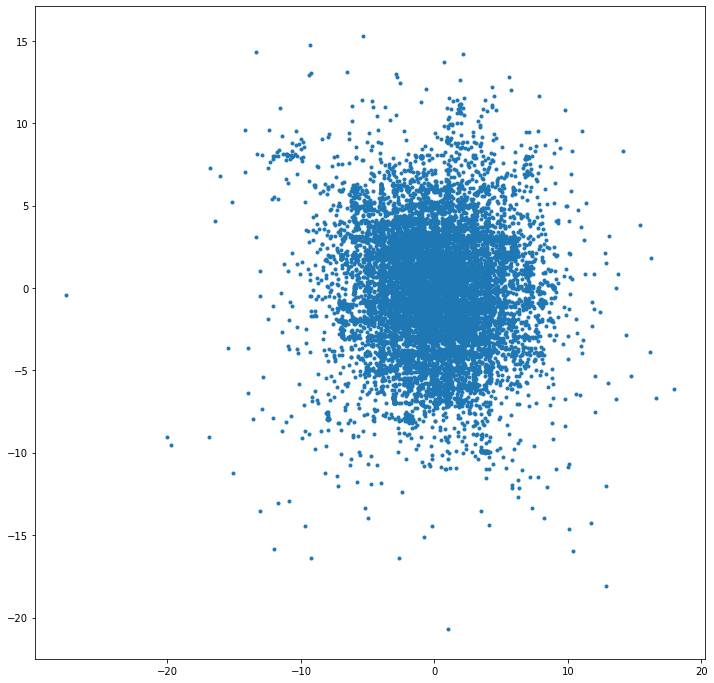

In [173]:
plt.figure(figsize=(12,12))
plt.scatter(xHist[::10,0],xHist[::10,1],marker=".")

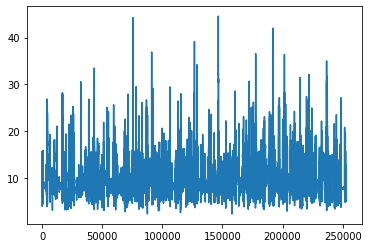

In [174]:
plt.plot(np.sum(xHist**2,axis=1)**0.5)

Let's try this with a function that is more similar to the wing optimum.

In [175]:
def func(pars, x):
    # Rosenbrock function
    # x is the multidimensional position vector
    return np.sum([100.*(x[i+1]-x[i]**2)**2+(1-x[i])**2 for i in range(len(x)-1)])

In [176]:
func([],[1,1,1])

0.0

In [203]:
#initialize
dim = 10 # can change dimensionality 
x = 5.-10.*np.random.rand(dim)
cost = func([],x)
xMin = np.copy(x)
costMin = np.copy(cost)
xHist = np.array([x])
costHist = np.array([cost])
accept=np.zeros(50)
accept[::4]+=1.

In [205]:
step = 1.
anneal = 1.
stepDecrementIndex = 1000
maxSteps=1000000

for k in range(maxSteps):
    xStar = x + step*(1.-2.*np.random.rand(dim))
    costStar = func([],xStar)
    # This automatically adjusts the annealing exponent
    acceptRate = np.mean(accept)
    anneal = anneal*(1.+0.05*(acceptRate/0.25-1))
    # automatically adjust step size (heuristic)
    # Determine whether to move the chain forward
    if (cost/costStar)**anneal > np.random.random():
        x = xStar
        cost = costStar
        xHist = np.append(xHist,[x],axis=0)
        costHist = np.append(costHist,cost)
        accept = np.append(1.,accept[:-1])
    else:
        accept = np.append(0.,accept[:-1])
    # Update the global minimum if necessary
    if cost < costMin:
        xMin = x
        costMin = cost
        print([cost,anneal])
        
    # Every so often steps reset the chain and change the step size
    if np.random.random()>0.999:
        #x = xMin
        #cost = costMin
        step = 10.**(2.*np.random.random()-2.)
        #print("step size: " + str(step))
        
print(xMin)
print(costMin)

[93960.01975866283, 1.002]
[65092.69593380274, 1.0324065685098327]
[64349.30321641554, 1.0531579405368803]
[42400.27753843941, 1.0871243904350756]
[33693.746923787054, 1.1266130967932393]
[21654.73509906799, 1.1513985849226906]
[21160.77233960336, 1.3887700551296183]
[10763.261989710307, 1.4359882370040253]
[4046.3267179007867, 4.217809433061193]
[2932.873003591489, 4.995097352446398]
[1118.1370267819248, 5.612471404819363]
[946.2677432832749, 10.198996284726928]
[873.1142235115824, 11.914148998142453]
[556.165399612744, 9.453468551845384]
[465.8988520231057, 20.72615147113156]
[441.9253178596747, 10.539427546420173]
[300.465676019226, 9.150864965359203]
[236.74423395848336, 5.211881248878125]
[164.36897511583507, 5.55453229583369]
[109.72587248712364, 14.951551162962124]
[85.05346764231783, 4.748272164110989]
[75.02003327762091, 87.46482776916781]
[72.47383521229543, 89.93098605294726]
[67.4954681318974, 91.54974380190032]
[59.5131669501222, 93.19763919033453]
[52.92813943129045, 95.2

/tmp/ipykernel_8444/3629980263.py:14: RuntimeWarning: overflow encountered in double_scalars
  if (cost/costStar)**anneal > np.random.random():


[8.828949264527372, 10528275.18904575]
[8.514956715292861, 10844123.444717122]
[8.366575558173846, 11169447.148058636]
[8.165830546166633, 12205156.47375667]
[7.949683235019352, 12948450.503008451]
[7.931504340708628, 13843913.545994503]
[7.796943683485458, 16617620.294670828]
[7.738641528219941, 22482855.390556324]
[7.692653938207404, 20870404.337397072]
[7.689194365420375, 11015527.617709424]
[7.67311448229683, 9075711.120378759]
[7.663524282594434, 6126647.46625975]
[7.650317590364752, 5918341.452406918]
[7.61269305335526, 5568567.472569668]
[7.5993750692216055, 4881331.143177405]
[7.491165723678079, 4465742.626042638]
[7.422504763570759, 1784045.3431055597]
[7.267513536564502, 1513093.9827437957]
[7.165186654882982, 1128430.1932328576]
[7.13833249800596, 966440.1990997999]
[6.988602244350463, 871176.9284365128]
[6.949662213726983, 682779.1325574458]
[6.897548407263584, 665026.8751109522]
[6.883314861212684, 581932.1148959011]
[6.877676444588813, 5644.802464382425]
[6.83014042649179

Across a 10 dimensional unbounded optimization space, found damn close to the global minimum in only 1,000,000 steps, or about 30 seconds.

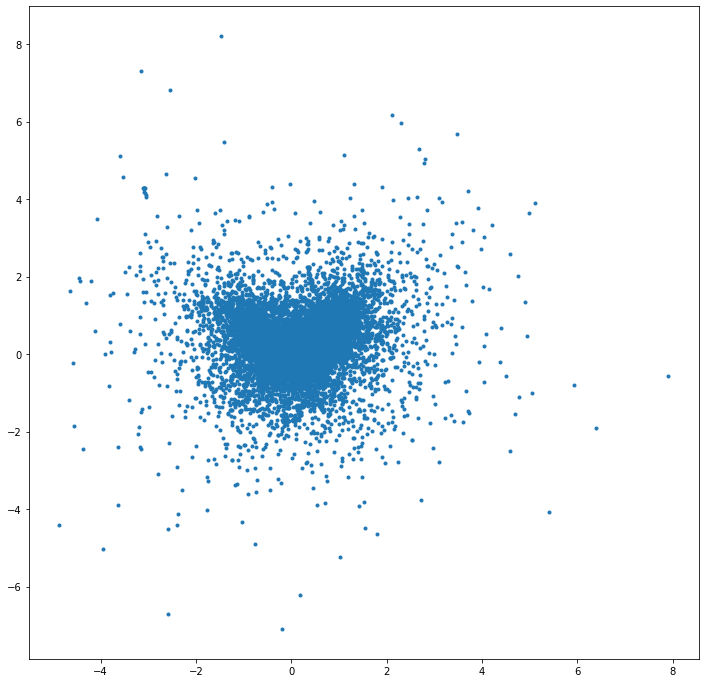

In [206]:
plt.figure(figsize=(12,12))
plt.scatter(xHist[::10,0],xHist[::10,1],marker=".")

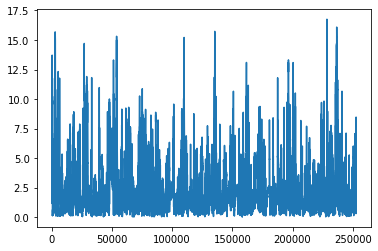

In [207]:
plt.plot(np.sum(xHist**2,axis=1)**0.5)